# Exploratory data analysis

In [2]:
from datetime import date, datetime
import pandas as pd

import matplotlib.pyplot as plt
# Read JSON file

## EDA for Training MCQs created so far till today

In [3]:

base_path = "../data"
today_date = date(2025,8,23)#date.today()
today_date_string = today_date.strftime("%Y%m%d")


In [4]:

training_mcq_report_file = f"{base_path}/training_ca_mcqs/instruction-data-{today_date}-report.json"
training_mcq_report_df = pd.read_json(training_mcq_report_file)
training_mcq_report_df 

,month,mcq_count
0,42025,50
1,52025,50
2,62025,50
3,72025,50
4,82025,50


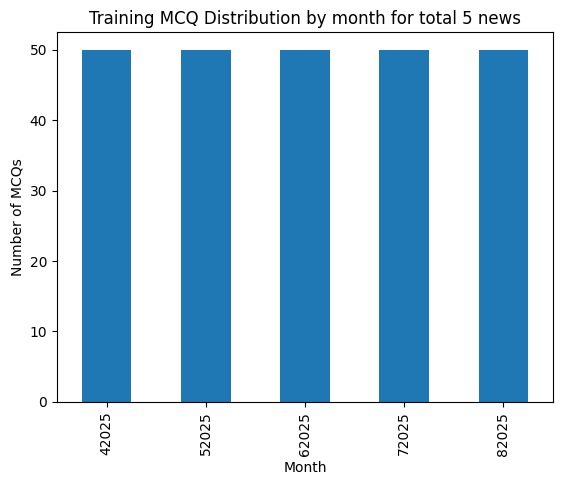

In [5]:
# Plot bar chart
training_mcq_report_df.plot(x="month", y="mcq_count", kind="bar", legend=False)

plt.title(f"Training MCQ Distribution by month for total {len(training_mcq_report_df)} news")
plt.xlabel("Month")
plt.ylabel("Number of MCQs")
plt.show()

## EDA for MCQ Generation instruction

### Word cloud on aggregated news content

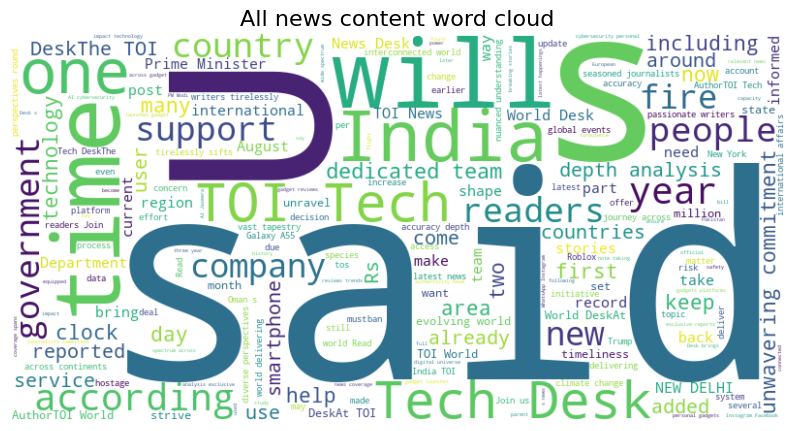

In [6]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


all_news_content_file = f"{base_path}/news_content/{today_date_string}/_{today_date_string}_all_news.txt"

# Read the text file
with open(all_news_content_file, "r", encoding="utf-8") as f:
    text = f.read()

# Generate the word cloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color="white",
    colormap="viridis",   # You can try 'plasma', 'inferno', 'cool', etc.
    stopwords=None
).generate(text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("All news content word cloud", fontsize=16)
plt.show()


### News content analysis & visualization

In [7]:
mcq_generation_instructions_file = f"{base_path}/news_content/{today_date_string}/__{today_date_string}_ca_mcqs_generation_instructions.json"


mcq_generation_instructoin_report_df = pd.read_json(mcq_generation_instructions_file)

mcq_generation_instructoin_report_df["title_word_count"]= mcq_generation_instructoin_report_df["title"].str.split().str.len()

mcq_generation_instructoin_report_df["input_word_count"]= mcq_generation_instructoin_report_df["input"].str.split().str.len()

mcq_generation_instructoin_report_df 

,link,topic,title,instruction,input,output,title_word_count,input_word_count
0,https://timesofindia.indiatimes.com/india/jk-h...,India,J&K: Hizbul Mujahideen sleeper cell busted; OG...,Generate a Multiple Choice Question with answe...,Jammu and Kashmir Police's SIA made a signific...,Question: \nOptions: \n[A] \n[B] \n[C] \n[D]...,13,386
1,https://timesofindia.indiatimes.com/india/indi...,India,India temporarily suspends most postal service...,Generate a Multiple Choice Question with answe...,"Effective August 25, 2025, the Department of P...",Question: \nOptions: \n[A] \n[B] \n[C] \n[D]...,22,626
2,https://timesofindia.indiatimes.com/india/bill...,India,"Bill to remove jailed CM, PM, ministers: TMC t...",Generate a Multiple Choice Question with answe...,All India Trinamool Congress criticized the Jo...,Question: \nOptions: \n[A] \n[B] \n[C] \n[D]...,17,438
3,https://timesofindia.indiatimes.com/india/dont...,India,'Don't make it a causality': Jaishankar on Ind...,Generate a Multiple Choice Question with answe...,External Affairs Minister S Jaishankar stated ...,Question: \nOptions: \n[A] \n[B] \n[C] \n[D]...,15,424
4,https://timesofindia.indiatimes.com/india/over...,India,‘Overlooking each other’s history’: Jaishankar...,Generate a Multiple Choice Question with answe...,External affairs minister Dr S Jaishankar on S...,Question: \nOptions: \n[A] \n[B] \n[C] \n[D]...,17,556
...,...,...,...,...,...,...,...,...
69,https://timesofindia.indiatimes.com/gadgets-ne...,Tech,Moto G54 receives a price cut in India: Here’s...,Generate a Multiple Choice Question with answe...,"The Moto G54 budget smartphone, with two varia...",Question: \nOptions: \n[A] \n[B] \n[C] \n[D]...,14,449
70,https://timesofindia.indiatimes.com/gadgets-ne...,Tech,Former Activision boss reportedly wants to buy...,Generate a Multiple Choice Question with answe...,"Bobby Kotick, former head of Activision Blizza...",Question: \nOptions: \n[A] \n[B] \n[C] \n[D]...,8,463
71,https://timesofindia.indiatimes.com/gadgets-ne...,Tech,Why Earth Sciences minister Rijiju is upset wi...,Generate a Multiple Choice Question with answe...,Why Earth Sciences minister Rijiju is upset wi...,Question: \nOptions: \n[A] \n[B] \n[C] \n[D]...,12,567
72,https://timesofindia.indiatimes.com/education/...,Education,Why will India not have any new law college in...,Generate a Multiple Choice Question with answe...,The Bar Council of India has imposed a three-y...,Question: \nOptions: \n[A] \n[B] \n[C] \n[D]...,14,903


### Topic wise news count

In [8]:
mcq_generation_instructoin_report_df1=mcq_generation_instructoin_report_df.groupby("topic").size().reset_index(name="topic count")
mcq_generation_instructoin_report_df1

,topic,topic count
0,Education,2
1,Environment,20
2,India,17
3,Tech,16
4,World,19


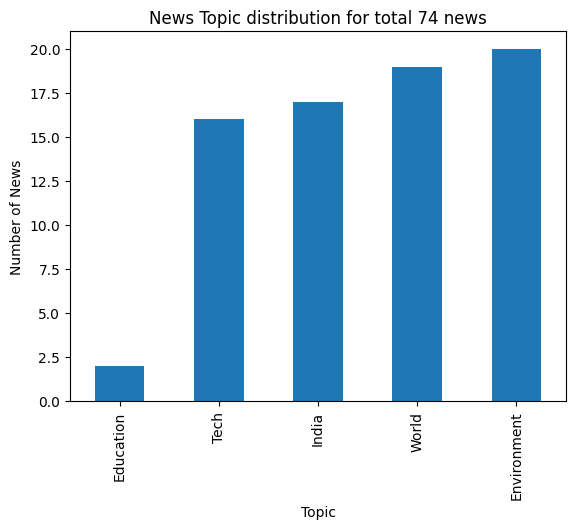

In [19]:
# Plot bar chart
mcq_generation_instructoin_report_df1.sort_values(by="topic count").plot(x="topic", y="topic count", kind="bar", legend=False)

plt.title(f"News Topic distribution for total {len(mcq_generation_instructoin_report_df)} news")
plt.xlabel("Topic")
plt.ylabel("Number of News")
plt.show()

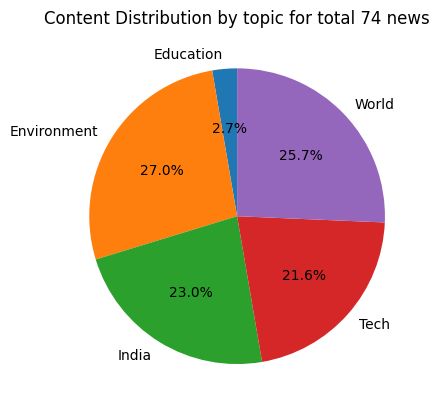

In [10]:
#Plot pie chart
plt.pie(mcq_generation_instructoin_report_df1["topic count"], labels=mcq_generation_instructoin_report_df1["topic"], autopct="%1.1f%%", startangle=90)
plt.title(f"Content Distribution by topic for total {len(mcq_generation_instructoin_report_df)} news")
plt.show()

### Word distribution for title and input

In [11]:
mcq_generation_instructoin_report_df[["title_word_count","input_word_count"]].mean().reset_index()


,index,0
0,title_word_count,12.540541
1,input_word_count,548.486486


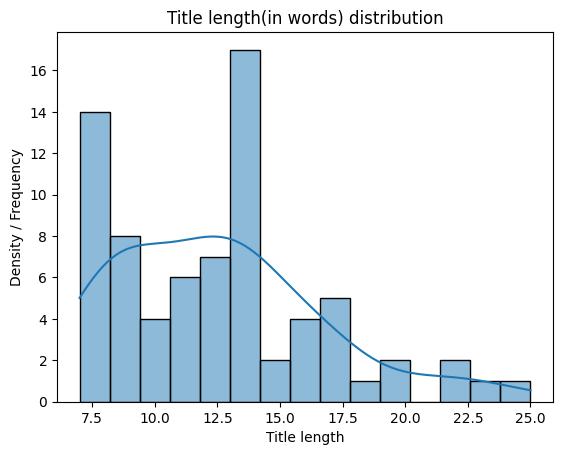

In [21]:
import seaborn as sns

sns.histplot(mcq_generation_instructoin_report_df["title_word_count"], kde=True, bins=15)

plt.title("Title length(in words) distribution")
plt.xlabel("Title length")
plt.ylabel("Density / Frequency")
plt.show()

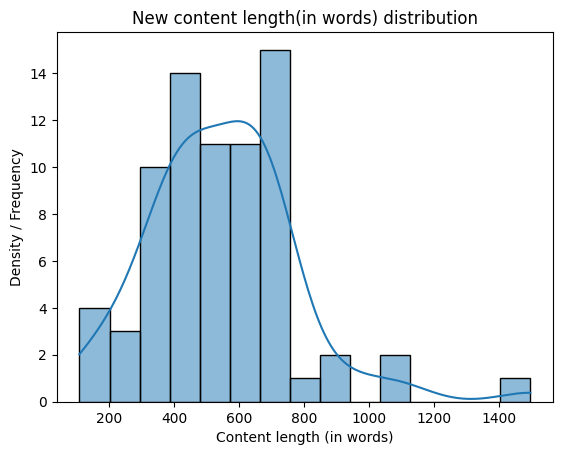

In [24]:
sns.histplot(mcq_generation_instructoin_report_df["input_word_count"], kde=True, bins=15)

plt.title("New content length(in words) distribution")
plt.xlabel("Content length (in words)")
plt.ylabel("Density / Frequency")
plt.show()

### Named entity detection

In [14]:
import spacy
nlp = spacy.load("en_core_web_sm")  # download with: python -m spacy download en_core_web_sm

# Process text
doc = nlp(text)

named_entities = []
# Print detected entities
for ent in doc.ents:
    ner ={}
    ner["entity_name"] = ent.text
    ner["entity_label"] = ent.label_
    named_entities.append(ner)


In [15]:
ner_df = pd.DataFrame(named_entities)
ner_df


,entity_name,entity_label
0,Hizbul Mujahideen,PERSON
1,OGW,ORG
2,Jammu,GPE
3,SIA,ORG
4,Altaf Hussain Wagay,PERSON
...,...,...
9009,Dr Rashmi,ORG
9010,20 years,DATE
9011,first,ORDINAL
9012,the same day,DATE


In [16]:

ner_group_df = ner_df.groupby("entity_label").size().reset_index(name="entity_label_count").sort_values(by="entity_label_count", ascending=False).reset_index(drop=True)
ner_group_df

,entity_label,entity_label_count
0,ORG,2466
1,GPE,1586
2,PERSON,1466
3,CARDINAL,1170
4,DATE,1044
5,NORP,310
6,LOC,190
7,PRODUCT,140
8,TIME,116
9,ORDINAL,108


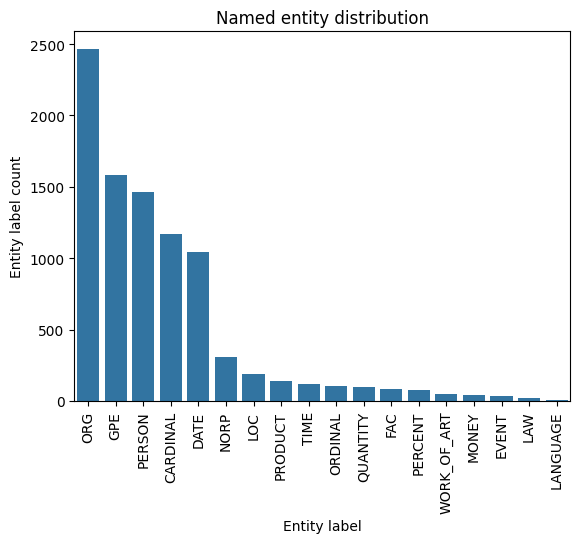

In [25]:
sns.barplot(data=ner_group_df,x="entity_label", y="entity_label_count")

# Rotate x-axis labels to vertical
plt.xticks(rotation=90)

plt.title("Named entity distribution")
plt.xlabel("Entity label")
plt.ylabel("Entity label count")
plt.show()